# Movie data

The file 'imdb.csv' contains data about 6178 movies and TV shows, which were scraped from the website <a href="https://www.imdb.com/">IMDb.com</a> (and which I downloaded from <a href="https://www.kaggle.com/datasets/mazenramadan/imdb-most-popular-films-and-series">Kaggle.com</a>)

Your task is to investigate what makes a good movie and write up your claims in a blog-style report, "10 ingredients for a good movie". You don't have to have exactly 10 (try for at least 5!). 

Our metric of a 'good movie' shall be the IMDb rating (base on users' votes). You may like to comment on whether this is a reliable metric.

This is a blog for geeky movie enthusiasts so you can support your claims with some numbers (correlations, decriptive statistics and the like) but try to avoid jargon and use the data to support the points you are making in the text, rather than robotically reporting statistics. 

Below I will suggest some avenues to explore but I encourage you to investigate the data yourself - play around with plotting the relationship between different variables before you settle down to write your report.

## What makes a good report?


Wt
It's up to you to find some interesting features in the data and show them effectively using plots

You should support your claims using descriptive statistics such the mean rating for different groups of movies or correlation coefficients

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')

### Import the data

In [2]:
imdb=pandas.read_csv('data/imdb.csv')

# get only the movies (ignoring TV shows)
movies=imdb[imdb['Type']=='Film']
movies

,Name,Date,Rating,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
0,No Time to Die,2021,7.6,107163.0,"Action, Adventure, Thriller",163.0,Film,PG-13,NaN,Mild,Moderate,Mild,Mild,Moderate
1,The Guilty,2021,6.3,64375.0,"Crime, Drama, Thriller",90.0,Film,R,NaN,None,None,Severe,None,Moderate
2,The Many Saints of Newark,2021,6.4,27145.0,"Crime, Drama",120.0,Film,R,NaN,Moderate,Severe,Severe,Moderate,Moderate
3,Venom: Let There Be Carnage,2021,6.4,30443.0,"Action, Adventure, Sci-Fi",97.0,Film,PG-13,NaN,None,Moderate,Moderate,Mild,Moderate
4,Dune,2021,8.3,84636.0,"Action, Adventure, Drama",155.0,Film,PG-13,NaN,None,Moderate,None,Mild,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173,The Human Centipede II (Full Sequence),2011,3.8,37492.0,Horror,91.0,Film,Not Rated,NaN,Severe,Severe,Severe,Mild,Severe
6174,Double Indemnity,1944,8.3,150448.0,"Crime, Drama, Film-Noir",107.0,Film,Passed,NaN,None,Mild,None,Mild,Mild
6175,Before the Devil Knows You're Dead,2007,7.3,100668.0,"Crime, Drama, Thriller",117.0,Film,R,NaN,Severe,Moderate,Severe,Severe,Severe
6176,Queen Bees,2021,6.0,887.0,"Comedy, Drama, Romance",100.0,Film,PG-13,NaN,None,None,Mild,Moderate,None


## Where to start?

Here are some myths (or truths?) for you to investigate to get you started

<ol>
<li> Movies are getting worse over time
<li> Longer movies are better
    <ul> <li>As well as investigating the general relationship, can you find some points of interest - for example, name cases of long movies that were also bad (certainly to be avoided!)? Are there any surprisingly long movies in the dataset? What about those that were short but sweet?</ul>
<li> More nudity makes for a highly rated movie
<li> Movies rated 15 are the worst!
    <ul><li>To do this you will need to create a new column converting the US and international certificates into their closest UK equivalent - U,PG,12,15 or 18</ul>
<li> Straight-to-TV movies have lower ratings than those shown in cinemas
    <ul><li>The straight-to-TV movies have certificates beginning in 'TV'</ul>
<li> Popular movies are better (you can use the number of votes as a measure of popularity of a movie, since people should only vote if they watched it - you may like to comment on whether this is a reasonabble measure of popularity or whether it may be biased)
</ol>


## Examples:

Here are a couple of examples to get you started:

### Example 1: Are movies getting worse over time?

According to IMDb raters, yes they are. Or to be more accurate, the number of low-rated movies increased over time, whilst a steady flow of high rated movies was also maintained.

Text(0.5, 0.98, 'Movie ratings over time')

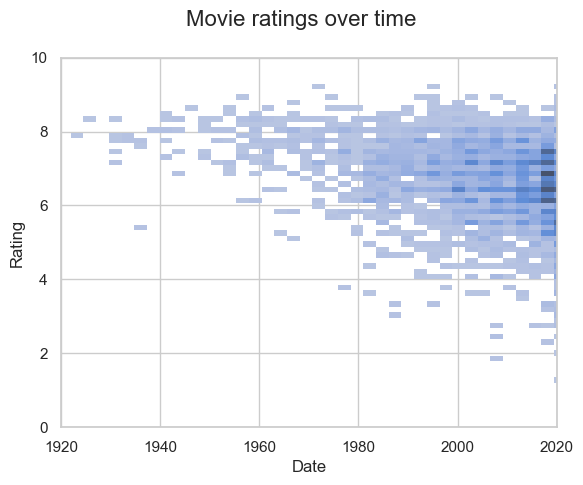

In [3]:
sns.histplot(data=movies, x='Date', y='Rating')
plt.xlim([1920,2020])
plt.ylim([0,10])
plt.suptitle('Movie ratings over time', fontsize=16)

Rating was negatively correlated with year of release (Spearman's r = -0.29)

In [4]:
movies[['Date','Rating']].corr(method='spearman')

,Date,Rating
Date,1.000000,-0.298428
Rating,-0.298428,1.000000


#### Thinking point - 
No need to put this in your blog, but you could test if that correlation would be likely to have happened due to chance (is it significant?) by bootstrapping and seeing how often you got a correlation as far from zero as r=-0.29 if you resampled the data.

### Example 2: Does swearing spoil a good movie?

Perhaps surpisingly, yes it does. At least, movies with no swearing (Profanity) at all seem to get slightly higher ratings.

In the plot below there is a small but perceptible advantage in ratings for movies with no Profanity - the average rating for a movie with no profanity was a third of one point (out of ten) higher than one with profanity!

In [5]:
print('mean rating - no profanity = ' + str(movies[movies['Profanity']=='None']['Rating'].mean()))
print('mean rating - with profanity = ' + str(movies[movies['Profanity']!='None']['Rating'].mean()))

mean rating - no profanity = 6.918087318087323
mean rating - with profanity = 6.5885078534031285


In [6]:
# plot ratings by 'alcohol content' of the movie
# note that I have set the order of the violins to increasing alcohol, rather than the default order which wasn't meaningful
sns.violinplot(data=movies, x='Profanity', y='Rate', order=['None','Mild','Moderate','Severe'])

ValueError: Could not interpret input 'Rate'

That said, there was an explosion in profanity from the 1960s onwards - so maybe this just reflects the fact that the old classics are the best movies!

Text(0.5, 0.98, 'Distribution profanity ratings over time')

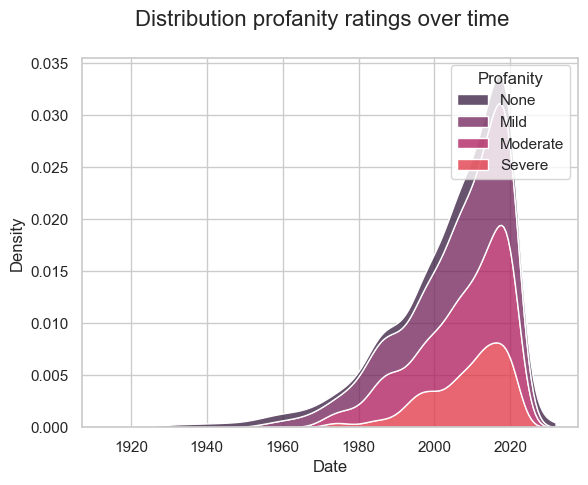

In [80]:
sns.set_palette('rocket')

sns.kdeplot(
    data=movies, 
    x='Date',  
    hue='Profanity', 
    multiple='stack',
    hue_order=['None','Mild','Moderate','Severe'])

plt.suptitle('Distribution profanity ratings over time', fontsize=16)

#### By the way....

Don't put this in your blog as it is too technical, but you might be interested to see it:

It looks like there is only a tiny effect of Profanity on ratings, but could it have occurred due to chance?

We construct a bootstrapped confidence interval for the difference in ratings between movies with and without profanity:

481
3965


<AxesSubplot:ylabel='Count'>

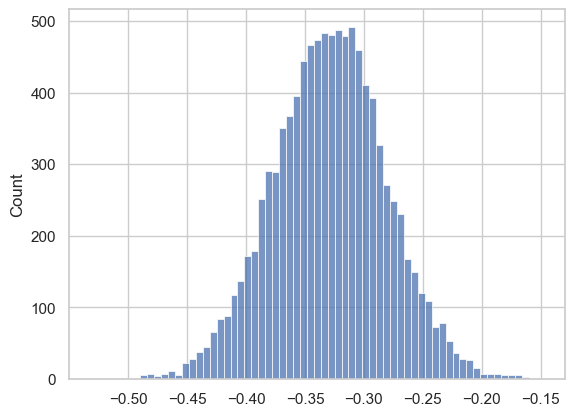

In [44]:
nReps = 10000
mDiff=np.empty(nReps)
n1=len(movies[movies['Profanity']=='None'])
n2=len(movies[movies['Profanity']!='None'])

print(n1)
print(n2)

for i in range(nReps):
    sample1 = movies[movies['Profanity']=='None'].sample(n1, replace=True)
    sample2 = movies[movies['Profanity']!='None'].sample(n2, replace=True)
    mDiff[i]= sample1['Rate'].mean()-sample2['Rate'].mean()
    
sns.histplot(mDiff)
plt.xlabel('Difference of means: no profanity- profanity')

Since the difference of means is almost always greater than ero, we can be confident that movies with no profanity really do have higher mean ratings - even if the difference is less than 0.3/10 points!

## Useful information: Movie Certificates

The movie certificates given are mostly US certificates but there are different schemes in use for movies shown in cinema and on TV. There are a fair few certificates in use in the database, some of which relate to only a few titles:


In [11]:
movies['Certificate'].value_counts()

R            1885
PG-13        1145
PG            530
None          296
Not Rated     189
TV-MA         109
G              70
Approved       42
TV-14          35
Passed         24
NC-17          14
TV-PG          13
E              12
(Banned)       10
TV-G           10
GP              6
X               6
TV-Y7           5
M               3
M/PG            2
Name: Certificate, dtype: int64


There are also some old (pre 1968) or international certificates mixed in there

To meaningfully use these data (for example to answer the question, are movies rated 15 the worst?) it would be helpful to group these into a smaller set of classifications - for example the closest UK equivalent 

UK movie ratings are:
<ul>
    <li> U - Universal - suitable for all (including young children)
    <li> PG - Parental Guidance - may be unsuitable for very young children
    <li> 12,15,18 - Not suitable for persons under the age of 12,15 or 18 respectively
</ul>

Alternatively, to answer the question about straight-to-TV movies, you will want to separate out those with a certificate beginning 'TV' (only ever shown on TV) from the others

The meaning of certificates should be Googlable but here are my notes on the certificates used in the dataset:

<ul>
<li>TV-Y: Designed to be appropriate for all children
<li>TV-Y7: Suitable for ages 7 and up
<li>G: Suitable for General Audiences
<li>TV-G: Suitable for General Audiences
<li>PG: Parental Guidance suggested
<li>TV-PG: Parental Guidance suggested
<li>PG-13: Parents strongly cautioned. May be Inappropriate for ages 12 and under.
<li>TV-14: Parents strongly cautioned. May not be suitable for ages 14 and under.
<li>R: Restricted. May be inappropriate for ages 17 and under.
<li>TV-MA: For Mature Audiences. May not be suitable for ages 17 and under.
<li>NC-17: Inappropriate for ages 17 and under
<li>M - Mature
<li>TV-Y7 - suitable for children over 7
<li>banned/approved/passed - pre 1968 classifications
</ul>

In reclassifying the movies you may consider excluding some cases that don't clearly fall into one category or another, for example the pre-1968 movies. 

There are also some remaining mysteries, for example, one certificate I was not able to understand was 'E': Google tells me that 'E' stands for educational or exempt but if I look which movies have this rating, I'm not so sure this is correct:

In [10]:
movies[movies['Certificate']=='E']

,Name,Date,Rate,Votes,Genre,Duration,Type,Certificate,Episodes,Nudity,Violence,Profanity,Alcohol,Frightening
429,Luca,2021,7.5,112694.0,"Animation, Adventure, Comedy",95.0,Film,E,NaN,None,Mild,None,None,Mild
521,Space Jam: A New Legacy,2021,4.4,56919.0,"Animation, Adventure, Comedy",115.0,Film,E,NaN,None,Mild,Mild,Mild,Mild
526,Godzilla vs. Kong,2021,6.4,176046.0,"Action, Sci-Fi, Thriller",113.0,Film,E,NaN,None,Moderate,Mild,Mild,Moderate
581,PAW Patrol: The Movie,2021,6.2,3898.0,"Animation, Adventure, Comedy",86.0,Film,E,NaN,Mild,Mild,None,None,Mild
851,In the Heights,2021,7.4,35374.0,"Drama, Musical, Romance",143.0,Film,E,NaN,Mild,None,Mild,Mild,None
872,The Boss Baby: Family Business,2021,5.9,11863.0,"Animation, Adventure, Comedy",107.0,Film,E,NaN,Mild,Mild,Mild,None,Mild
1978,The Comeback Trail,2020,5.6,4961.0,"Comedy, Crime",104.0,Film,E,NaN,Mild,Moderate,Moderate,Mild,Mild
2654,Peter Rabbit 2: The Runaway,2021,6.2,7310.0,"Animation, Adventure, Comedy",93.0,Film,E,NaN,None,Mild,None,None,Mild
2877,Spirit Untamed,2021,5.4,2585.0,"Animation, Adventure, Comedy",88.0,Film,E,NaN,None,Mild,Mild,None,Mild
3156,AINBO: Spirit of the Amazon,2021,4.7,933.0,"Animation, Adventure, Comedy",84.0,Film,E,NaN,No Rate,No Rate,No Rate,No Rate,No Rate


You may find this example useful in creating a new column for UK classifications:

In [ ]:
### Sammi, how do I tidily create a new column where, say:
# G, TV-G, TV-Y and TV-7 are reclassified as U; 
# PG and TV-PG are reclassified as PG, 
# etc